# K-Means Algorithm


#### description

fill in some text

In [1]:
# Install packages
import sys
python = sys.executable

# sodapy
!{python} -m pip install sodapy


In [2]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt



In [68]:
# Get data
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("health.data.ny.gov", None)

# Example authenticated client (needed for non-public datasets):

client = Socrata("health.data.ny.gov",
                 "app_token",
                 username="username",
                 password="password")

# First 20,000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
importnyc = client.get("82xm-y6g8", limit=20000)

# Convert to pandas DataFrame
events = pd.DataFrame.from_records(importnyc)

In [76]:
# Load Data
events = pd.read_csv('events.csv',index_col=0)

In [77]:
events.head()

,abortion_edit_indicator,age_group,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_medical_surgical_description,apr_risk_of_mortality,apr_severity_of_illness_code,apr_severity_of_illness_description,...,patient_disposition,payment_typology_1,payment_typology_2,payment_typology_3,permanent_facility_id,race,total_charges,total_costs,type_of_admission,zip_code_3_digits
0,N,70 or Older,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,Medical,Minor,2,Moderate,...,Home or Self Care,Medicare,Private Health Insurance,NaN,37.0,White,5333.90,4818.42,Urgent,147
1,N,70 or Older,422,Hypovolemia & related electrolyte disorders,10,"Endocrine, Nutritional and Metabolic Diseases ...",Medical,Moderate,2,Moderate,...,Hosp Basd Medicare Approved Swing Bed,Medicare,NaN,NaN,37.0,White,4865.99,4588.78,Elective,147
2,N,70 or Older,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,Medical,Minor,1,Minor,...,Home or Self Care,Medicare,Private Health Insurance,NaN,37.0,White,5901.54,5559.56,Urgent,147
3,N,50 to 69,249,"Other gastroenteritis, nausa & vomiting",6,Diseases and Disorders of the Digestive System,Medical,Minor,2,Moderate,...,Home or Self Care,Medicare,NaN,NaN,37.0,White,3619.08,3567.25,Elective,147
4,N,70 or Older,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,Medical,Moderate,1,Minor,...,Home or Self Care,Medicare,Blue Cross/Blue Shield,Private Health Insurance,37.0,White,3185.87,3167.89,Elective,147


In [78]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 34 columns):
abortion_edit_indicator                20000 non-null object
age_group                              20000 non-null object
apr_drg_code                           20000 non-null int64
apr_drg_description                    20000 non-null object
apr_mdc_code                           20000 non-null int64
apr_mdc_description                    20000 non-null object
apr_medical_surgical_description       20000 non-null object
apr_risk_of_mortality                  20000 non-null object
apr_severity_of_illness_code           20000 non-null int64
apr_severity_of_illness_description    20000 non-null object
birth_weight                           20000 non-null int64
ccs_diagnosis_code                     20000 non-null int64
ccs_diagnosis_description              20000 non-null object
ccs_procedure_code                     20000 non-null int64
ccs_procedure_description              2000

In [79]:
events.dtypes[events.isnull().sum()>0]

hospital_county                  object
hospital_service_area            object
operating_certificate_number    float64
payment_typology_2               object
payment_typology_3               object
permanent_facility_id           float64
zip_code_3_digits                object
dtype: object

In [80]:
events.describe()

,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,birth_weight,ccs_diagnosis_code,ccs_procedure_code,discharge_year,operating_certificate_number,permanent_facility_id,total_charges,total_costs
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.0,1.991400e+04,19914.000000,2.000000e+04,20000.000000
mean,456.076300,11.399600,2.063900,357.235000,218.122300,84.94795,2015.0,5.523537e+05,92.887516,1.465175e+04,8911.778151
std,243.401102,6.003159,0.901087,1029.219908,189.775228,86.72945,0.0,2.703510e+05,39.305014,2.441539e+04,14316.997364
min,4.000000,1.000000,1.000000,0.000000,1.000000,0.00000,2015.0,2.267000e+05,37.000000,3.800000e+02,211.670000
25%,201.000000,5.000000,1.000000,0.000000,108.000000,0.00000,2015.0,4.010010e+05,66.000000,4.831630e+03,2786.220000
50%,463.000000,11.000000,2.000000,0.000000,159.000000,58.00000,2015.0,6.010000e+05,98.000000,8.421380e+03,4870.655000
75%,710.000000,16.000000,3.000000,0.000000,218.000000,152.00000,2015.0,6.020010e+05,103.000000,1.613914e+04,9537.275000
max,952.000000,25.000000,4.000000,5600.000000,917.000000,231.00000,2015.0,1.401014e+06,207.000000,1.168539e+06,632837.700000


In [81]:
events.type_of_admission.unique()

array(['Urgent', 'Elective', 'Emergency', 'Newborn', 'Not Available',
       'Trauma'], dtype=object)

In [82]:
# exclude planned procedures and pregnancies 
events=events.loc[~events.type_of_admission.isin(['Elective','Newborn']),]

In [83]:
events.type_of_admission.unique()
events.shape

(13733, 34)

In [84]:
# handling missing data when there is a potential skew
missing=events.zip_code_3_digits.isna()

events.loc[missing,].describe()

,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,birth_weight,ccs_diagnosis_code,ccs_procedure_code,discharge_year,operating_certificate_number,permanent_facility_id,total_charges,total_costs
count,198.000000,198.000000,198.000000,198.0,198.000000,198.000000,198.0,1.430000e+02,143.000000,198.000000,198.000000
mean,475.681818,12.040404,1.893939,0.0,317.727273,77.282828,2015.0,5.922408e+05,103.286713,15263.454293,8247.259444
std,269.029983,6.733384,0.851313,0.0,256.512388,90.427697,0.0,3.388825e+05,47.101123,31846.136566,13898.507454
min,4.000000,1.000000,1.000000,0.0,2.000000,0.000000,2015.0,2.267000e+05,37.000000,1232.100000,509.650000
25%,203.250000,5.000000,1.000000,0.0,122.000000,0.000000,2015.0,4.010010e+05,66.000000,4977.785000,2881.200000
50%,463.000000,11.000000,2.000000,0.0,178.500000,41.500000,2015.0,4.270000e+05,102.000000,7861.100000,4341.785000
75%,751.000000,19.000000,2.000000,0.0,657.000000,170.500000,2015.0,6.020010e+05,114.000000,13341.335000,7575.010000
max,890.000000,24.000000,4.000000,0.0,661.000000,228.000000,2015.0,1.401014e+06,207.000000,325120.560000,133092.940000


In [85]:
events.loc[missing,].apr_mdc_description.value_counts().head()

Mental Diseases and Disorders                       67
Diseases and Disorders of the Respiratory System    24
Diseases and Disorders of the Digestive System      21
Diseases and Disorders of the Circulatory System    17
Pregnancy, Childbirth and the Puerperium            12
Name: apr_mdc_description, dtype: int64

In [14]:
#prop=list(events.loc[missing,].apr_mdc_description.value_counts().index)


In [15]:
#events.loc[missing,].apr_mdc_description.value_counts()/events.loc[events.apr_mdc_description.isin(prop),].apr_mdc_description.value_counts()

In [16]:
#events.loc[events.apr_mdc_description.isin(prop),].apr_mdc_description.value_counts(normalize=True)

In [86]:
# create a function to track missing labels/categorical values

def plotMissingCat(df,               # reference dataframe
                   col,              # column with complete information 
                   cols_missing,     # column(s) with missing data as NaN
                   minObs,           # set a minimum bar for number of observations in each group
                   stats=True,       # calculate and print stats
                   outdf=True        # return transformed dataset
                  ):
    
    '''a function to find the percentage of missing categorical values in a list of columns partitioning on another column 
    with complete information'''
    
    out=pd.concat([df[col],df[cols_missing].isna()],axis=1)
    
    out=out.groupby(col).filter(lambda x: len(x) >= minObs)
    
    
    # Find the total count and proportion of the data in each partition
    ops={}
    for missing in cols_missing:
        
        # get mean or average value for all columns with missing data (they're in binary format)
        # you can add as many ops as you want
        
        ops[missing] = ["mean"] 
        
    # Calculate counts of data in each category. Ths operation is performed on col
    
    # custom function percent 
    col_len=len(df[col])
    
    percent=lambda x: x.value_counts(dropna=False)/col_len
    percent.__name__ = "PercentScale"
    
    # add functions to list of operations
    ops[col]=["count",percent] 
    
    out_prop=out.groupby(col).agg(ops) 
    
    # label columns
    
    colnames=['missing'+ colname[0].capitalize() + 
              colname[1].capitalize() if colname[0] != col else colname[0].capitalize() + 
              colname[1].capitalize() for colname in out_prop.columns]
    
    out_prop.columns=colnames

    out_prop.head(5)
    
    if outdf:
        return out,out_prop
    else:
        return out_prop




In [87]:
# df_out, df_prop = plotMissingCat(dfname,'partitioncol',['missingcol1','missingcol2'],min#missing)
df_out, df_prop =plotMissingCat(events,'apr_mdc_description',['zip_code_3_digits','permanent_facility_id'],5)

In [88]:
df_prop.sort_values(by=df_prop.columns[0],ascending=False).head(10)

,missingZip_code_3_digitsMean,missingPermanent_facility_idMean,Apr_mdc_descriptionCount,Apr_mdc_descriptionPercentscale
apr_mdc_description,,,,
"Pregnancy, Childbirth and the Puerperium",0.042857,0.028571,280,0.020389
Mental Diseases and Disorders,0.032196,0.004805,2081,0.151533
"Poisonings, Toxic Effects, Other Injuries and Other Complications of Treatment",0.029240,0.017544,171,0.012452
Diseases and Disorders of the Nervous System,0.028986,0.005797,345,0.025122
"Diseases and Disorders of the Skin, Subcutaneous Tissue and Breast",0.021680,0.013550,369,0.026870
Diseases and Disorders of the Digestive System,0.014604,0.006259,1438,0.104711
"Endocrine, Nutritional and Metabolic Diseases and Disorders",0.013825,0.002304,434,0.031603
Diseases and Disorders of the Respiratory System,0.010729,0.004470,2237,0.162892
Alcohol/Drug Use and Alcohol/Drug Induced Organic Mental Disorders,0.010638,0.000000,188,0.013690


In [20]:
#events.loc[missing,['zip_code_3_digits','permanent_facility_id','facility_name']].head(10)

#### zip is patient zip code 
Type is Char. Length is 3.  The first three digits of the patient's zip code.  
#### blank for:
-	population size less than 20,000
-	abortion records, or
-	cell size less than 10 on population classification strata. 
“OOS” are Out of State zip codes.  

In [89]:
# Can we uses some provider information to predict zip?
import re
pattern='zip|facility|area|county|region|place|department|agency|abortion'
colnames=events.columns.str.strip()

# Create the Boolean vector: mask
mask =colnames.str.contains(pattern)
colnames=colnames[mask]
colnames

Index(['abortion_edit_indicator', 'emergency_department_indicator',
       'facility_name', 'hospital_county', 'hospital_service_area',
       'permanent_facility_id', 'zip_code_3_digits'],
      dtype='object')

In [90]:
events.loc[missing,colnames].sample(10)

,abortion_edit_indicator,emergency_department_indicator,facility_name,hospital_county,hospital_service_area,permanent_facility_id,zip_code_3_digits
356,N,Y,Redacted for Confidentiality,NaN,NaN,NaN,NaN
3589,N,Y,Olean General Hospital,Cattaraugus,Western NY,66.0,NaN
147,N,Y,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,Allegany,Western NY,39.0,NaN
1261,N,Y,Redacted for Confidentiality,NaN,NaN,NaN,NaN
9756,N,Y,Redacted for Confidentiality,NaN,NaN,NaN,NaN
19325,N,N,Buffalo General Medical Center,Erie,Western NY,207.0,NaN
11045,N,Y,Womans Christian Assoc Hospital - WCA Hosp at ...,Chautauqua,Western NY,102.0,NaN
3466,N,Y,Olean General Hospital,Cattaraugus,Western NY,66.0,NaN
17441,N,N,Redacted for Confidentiality,NaN,NaN,NaN,NaN
19855,N,N,Buffalo General Medical Center,Erie,Western NY,207.0,NaN


In [91]:
events.loc[~missing,colnames].sample(10)

,abortion_edit_indicator,emergency_department_indicator,facility_name,hospital_county,hospital_service_area,permanent_facility_id,zip_code_3_digits
53,N,N,Cuba Memorial Hospital Inc,Allegany,Western NY,37.0,147
18402,N,Y,TLC Health Network Lake Shore Hospital,Chautauqua,Western NY,114.0,140
8187,N,Y,Brooks Memorial Hospital,Chautauqua,Western NY,98.0,140
795,N,Y,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,Allegany,Western NY,39.0,148
8856,N,Y,Brooks Memorial Hospital,Chautauqua,Western NY,98.0,140
19577,N,N,Buffalo General Medical Center,Erie,Western NY,207.0,147
15962,N,Y,Woman's Christian Association,Chautauqua,Western NY,103.0,147
4796,N,Y,Olean General Hospital,Cattaraugus,Western NY,66.0,148
17505,N,Y,TLC Health Network Lake Shore Hospital,Chautauqua,Western NY,114.0,141
3390,N,Y,Olean General Hospital,Cattaraugus,Western NY,66.0,147


In [92]:
fidfilter=events.permanent_facility_id.isna()

events=events.loc[~fidfilter,]

events.shape

(13678, 34)

In [93]:
events.loc[missing,].describe()

,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,birth_weight,ccs_diagnosis_code,ccs_procedure_code,discharge_year,operating_certificate_number,permanent_facility_id,total_charges,total_costs
count,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,1.430000e+02,143.000000,143.000000,143.000000
mean,501.650350,12.699301,1.972028,0.0,346.545455,79.272727,2015.0,5.922408e+05,103.286713,16951.047133,8886.310140
std,273.939961,6.844382,0.838712,0.0,269.690661,93.180287,0.0,3.388825e+05,47.101123,36708.928327,15707.342169
min,4.000000,1.000000,1.000000,0.0,2.000000,0.000000,2015.0,2.267000e+05,37.000000,1600.500000,858.200000
25%,214.500000,5.500000,1.000000,0.0,109.500000,0.000000,2015.0,4.010010e+05,66.000000,4843.700000,2893.785000
50%,663.000000,16.000000,2.000000,0.0,197.000000,43.000000,2015.0,4.270000e+05,102.000000,7938.800000,4398.040000
75%,751.000000,19.000000,2.000000,0.0,657.000000,207.500000,2015.0,6.020010e+05,114.000000,14509.345000,8909.020000
max,890.000000,24.000000,4.000000,0.0,661.000000,228.000000,2015.0,1.401014e+06,207.000000,325120.560000,133092.940000


In [94]:
events_train=events.loc[~missing,colnames[2:]]
train_cols=events_train.columns[:-1]
events_group=events_train.groupby(list(train_cols))

In [95]:
data=[]

for name, group in events_group:
    data.append([*name, group.zip_code_3_digits.value_counts().index[0]])
    
df=pd.DataFrame(data,columns=[*train_cols,'zip_code_3_digits'])
df


,facility_name,hospital_county,hospital_service_area,permanent_facility_id,zip_code_3_digits
0,Brooks Memorial Hospital,Chautauqua,Western NY,98.0,140
1,Buffalo General Medical Center,Erie,Western NY,207.0,140
2,Cuba Memorial Hospital Inc,Allegany,Western NY,37.0,147
3,Memorial Hosp of Wm F & Gertrude F Jones A/K/A...,Allegany,Western NY,39.0,148
4,Olean General Hospital,Cattaraugus,Western NY,66.0,147
5,TLC Health Network Lake Shore Hospital,Chautauqua,Western NY,114.0,140
6,Westfield Memorial Hospital Inc,Chautauqua,Western NY,111.0,147
7,Woman's Christian Association,Chautauqua,Western NY,103.0,147
8,Womans Christian Assoc Hospital - WCA Hosp at ...,Chautauqua,Western NY,102.0,147


In [96]:
events_test=events.loc[missing,].drop(columns='zip_code_3_digits')
events_test=pd.merge(left=events_test, right=df)
events_test["zip_imputed"]=1
events_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 35 columns):
abortion_edit_indicator                143 non-null object
age_group                              143 non-null object
apr_drg_code                           143 non-null int64
apr_drg_description                    143 non-null object
apr_mdc_code                           143 non-null int64
apr_mdc_description                    143 non-null object
apr_medical_surgical_description       143 non-null object
apr_risk_of_mortality                  143 non-null object
apr_severity_of_illness_code           143 non-null int64
apr_severity_of_illness_description    143 non-null object
birth_weight                           143 non-null int64
ccs_diagnosis_code                     143 non-null int64
ccs_diagnosis_description              143 non-null object
ccs_procedure_code                     143 non-null int64
ccs_procedure_description              143 non-null object
discharge_year  

In [97]:
events["zip_imputed"]=0
events_cleaned=pd.concat([events.loc[~missing,], events_test])
events_cleaned.shape
#events_cleaned.info()
#events_cleaned.loc[events_cleaned["zip_imputed"]==1]

(13678, 35)

In [98]:
events_cleaned.sample(1).values

array([['N', '18 to 29', 171,
        'Perm cardiac pacemaker implant w/o AMI, heart failure or shock',
        5, 'Diseases and Disorders of the Circulatory System',
        'Surgical', 'Minor', 2, 'Moderate', 0, 106,
        'Cardiac dysrhythmias', 48, 'CARDIAC PACEMAKER/DEFIB', 2015, 'N',
        'Not Span/Hispanic', 'Buffalo General Medical Center', 'M',
        'Erie', 'Western NY', '3', 1401014.0, 'Home or Self Care',
        'Medicaid', 'Self-Pay', nan, 207.0, 'White', 45519.79, 16854.77,
        'Urgent', '140', 0]], dtype=object)

### Major Diagnostic Category
The Major Diagnostic Categories (MDC) are formed by dividing all possible principal diagnoses (from ICD-9-CM) into 25 mutually exclusive diagnosis areas. MDC codes, like diagnosis-related group (DRG) codes, are primarily a claims and administrative data element unique to the United States medical care reimbursement system. DRG codes also are mapped, or grouped, into MDC codes.
Major Diagnostic Category - Wikipedia
https://en.wikipedia.org/wiki/Major_Diagnostic_Category

In [99]:
# Can we uses some patient information to group events?
pattern='zip|age|apr_mdc|race|stay|costs|gender|ethnic|severity|typology_1|year'
colnames=events_cleaned.columns.str.strip()

# Create the Boolean vector: mask
mask =colnames.str.contains(pattern)
colnames=colnames[mask]
colnames

Index(['age_group', 'apr_mdc_code', 'apr_mdc_description',
       'apr_severity_of_illness_code', 'apr_severity_of_illness_description',
       'discharge_year', 'ethnicity', 'gender', 'length_of_stay',
       'payment_typology_1', 'race', 'total_costs', 'zip_code_3_digits',
       'zip_imputed'],
      dtype='object')

In [100]:
### Different ways of getting the data

# Write/extract the values of colnames to a list
events_cleaned[[*colnames]].head(5)

# List Comprehension
## events_cleaned[[c for c in colnames]].head(5)


,age_group,apr_mdc_code,apr_mdc_description,apr_severity_of_illness_code,apr_severity_of_illness_description,discharge_year,ethnicity,gender,length_of_stay,payment_typology_1,race,total_costs,zip_code_3_digits,zip_imputed
0,70 or Older,4,Diseases and Disorders of the Respiratory System,2,Moderate,2015,Not Span/Hispanic,F,4,Medicare,White,4818.42,147,0
2,70 or Older,4,Diseases and Disorders of the Respiratory System,1,Minor,2015,Not Span/Hispanic,F,4,Medicare,White,5559.56,147,0
6,70 or Older,4,Diseases and Disorders of the Respiratory System,1,Minor,2015,Not Span/Hispanic,F,4,Medicare,White,4929.92,147,0
12,70 or Older,4,Diseases and Disorders of the Respiratory System,2,Moderate,2015,Not Span/Hispanic,F,3,Medicare,White,4721.99,147,0
14,50 to 69,4,Diseases and Disorders of the Respiratory System,2,Moderate,2015,Not Span/Hispanic,F,4,Medicare,White,5815.08,147,0


In [101]:
# Define function to catch any non numeric values in an array
def is_number_tryexcept(s):
    """ Returns False if non numeric """
    try:
        float(s)
        return True
    except ValueError:
        return False

errors={}

for x in ['total_costs', 'length_of_stay']:
    errors[x]=events_cleaned[x].apply(is_number_tryexcept)

for column, mask in errors.items():
    print(column)
    print(events_cleaned.loc[~mask,[column]])

events_cleaned.loc[~mask,['length_of_stay']]=120
print(events_cleaned.loc[~mask,['length_of_stay']])

for x in ['total_costs', 'length_of_stay']:
    events_cleaned[x]=pd.to_numeric(events_cleaned[x]).round()   
    


total_costs
Empty DataFrame
Columns: [total_costs]
Index: []
length_of_stay
      length_of_stay
10515          120 +
11200          120 +
11707          120 +
18377          120 +
18527          120 +
      length_of_stay
10515            120
11200            120
11707            120
18377            120
18527            120


In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x=events_cleaned[[c for c in events_cleaned.columns if c in ['length_of_stay', 'total_costs']]]

x_scaled = scaler.fit_transform(x)

x_scaled



array([[-0.22984815, -0.32729124],
       [-0.22984815, -0.27800485],
       [-0.22984815, -0.31985178],
       ...,
       [ 4.5765215 ,  8.19320896],
       [-0.22984815, -0.28956257],
       [-0.22984815,  0.01173533]])

In [60]:
# Building the Model
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

# KMeans requires we provide the number of clusters before hand - however we can run with different sizes to find the optimum number
# What we will look to do is minimize the within-cluster sum-of-squares or wcss but this decreases as we grow the number of clusters
# As such we are trying to find the point with the biggest change in gradient
wcss=[]

# We have 25 mdc codes, so we want fewer clusters
for i in range(1,24):
    # KMeans++ is a newer algorithm that handles starting positions smartly
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

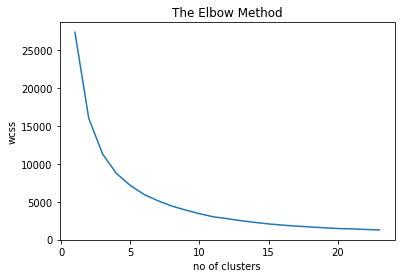

In [61]:
# Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,24), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7923718042891148
For n_clusters = 3 The average silhouette_score is : 0.6843450575038004
For n_clusters = 4 The average silhouette_score is : 0.6178998627594373
For n_clusters = 5 The average silhouette_score is : 0.5750222183047967
For n_clusters = 6 The average silhouette_score is : 0.5290932035993751
For n_clusters = 7 The average silhouette_score is : 0.5277624028583772
For n_clusters = 8 The average silhouette_score is : 0.4616341396191051
For n_clusters = 9 The average silhouette_score is : 0.4395694946646619
For n_clusters = 10 The average silhouette_score is : 0.4567492632472307
For n_clusters = 11 The average silhouette_score is : 0.4548752611950425
For n_clusters = 12 The average silhouette_score is : 0.3988191428143238
For n_clusters = 13 The average silhouette_score is : 0.4350455992074744
For n_clusters = 14 The average silhouette_score is : 0.4059280605040443
For n_clusters = 15 The average silhouette_score is : 0.439

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 22 The average silhouette_score is : 0.41556442347055267


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


For n_clusters = 23 The average silhouette_score is : 0.42756853864197675


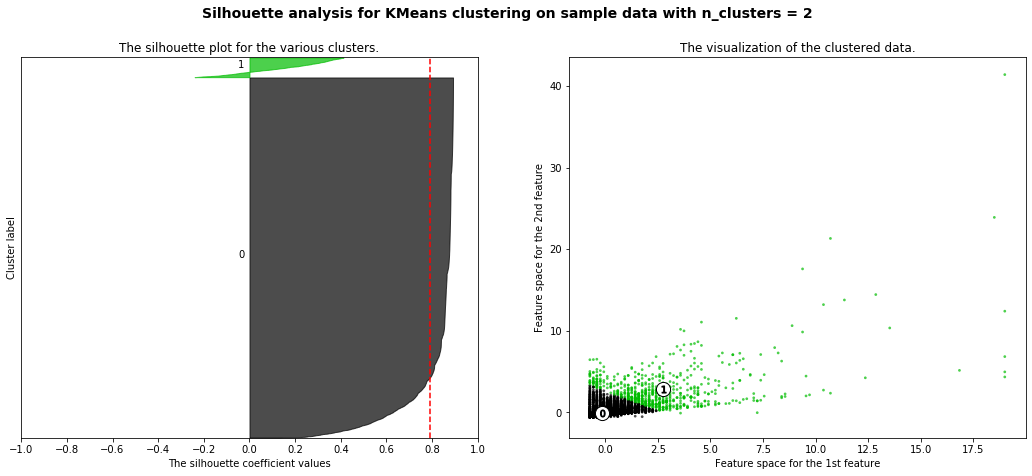

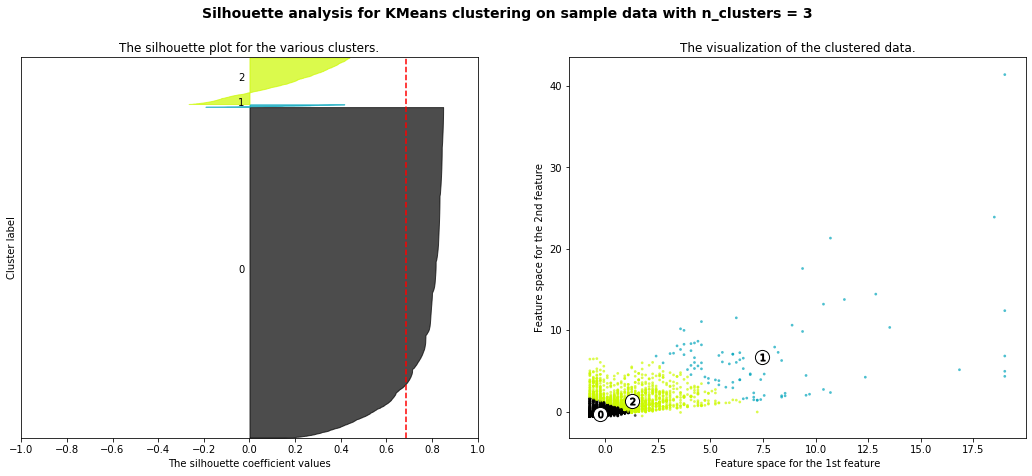

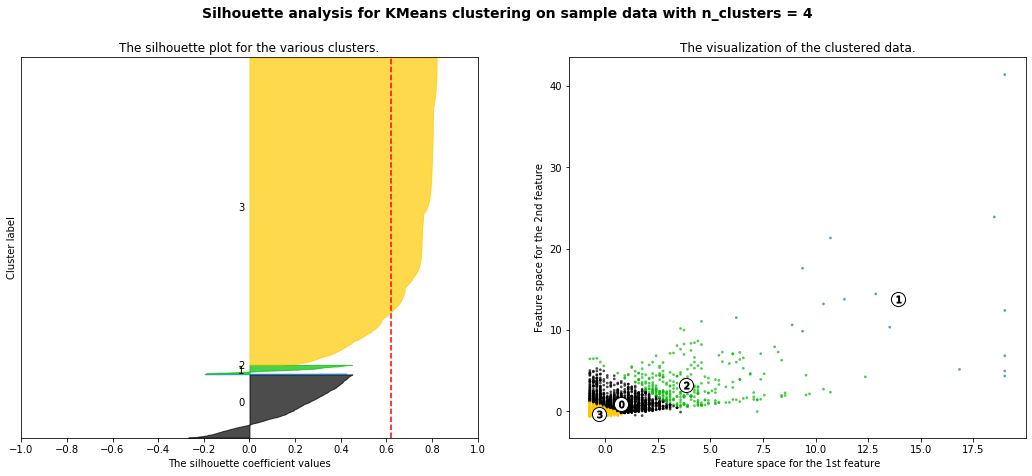

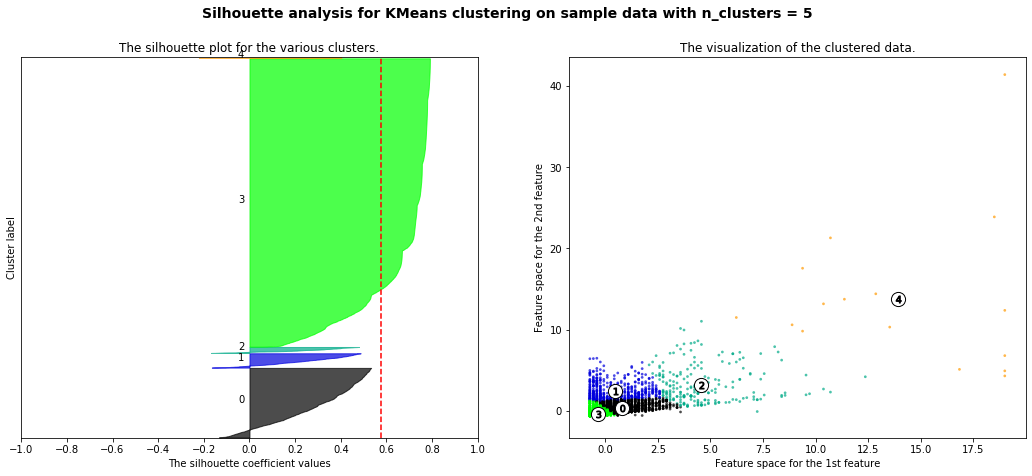

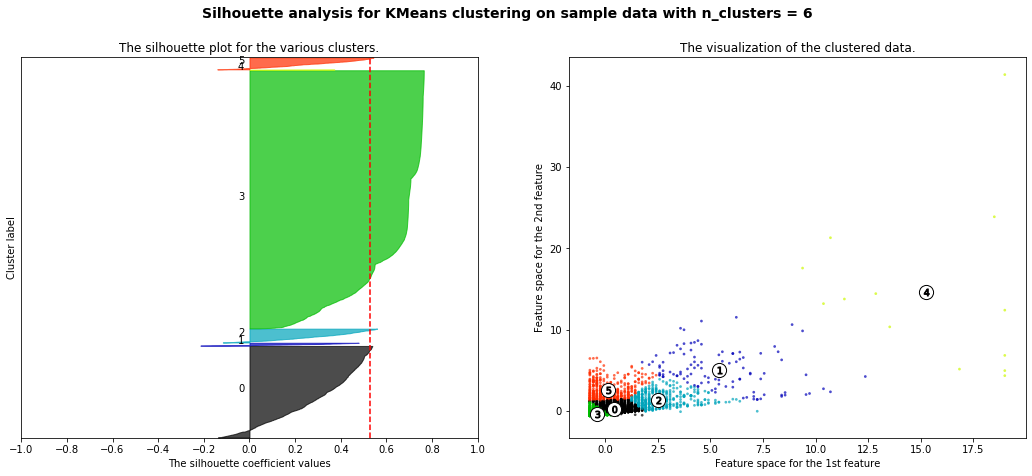

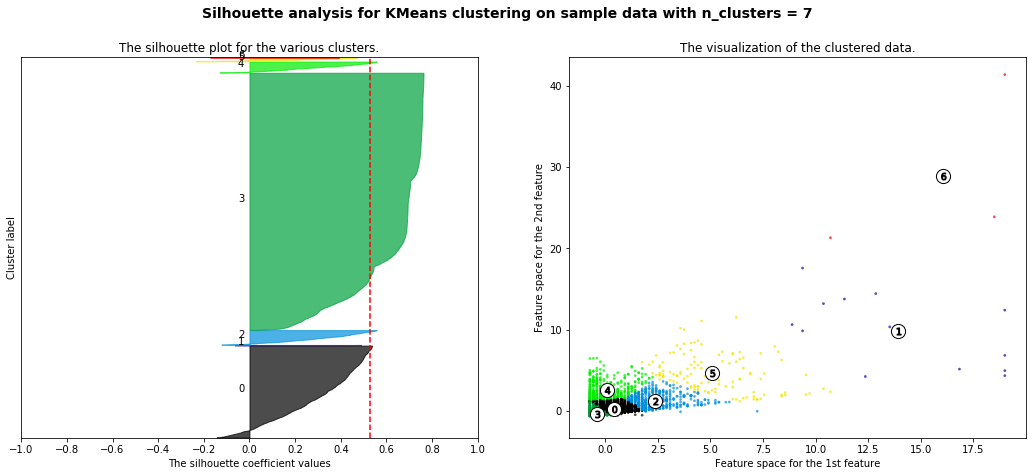

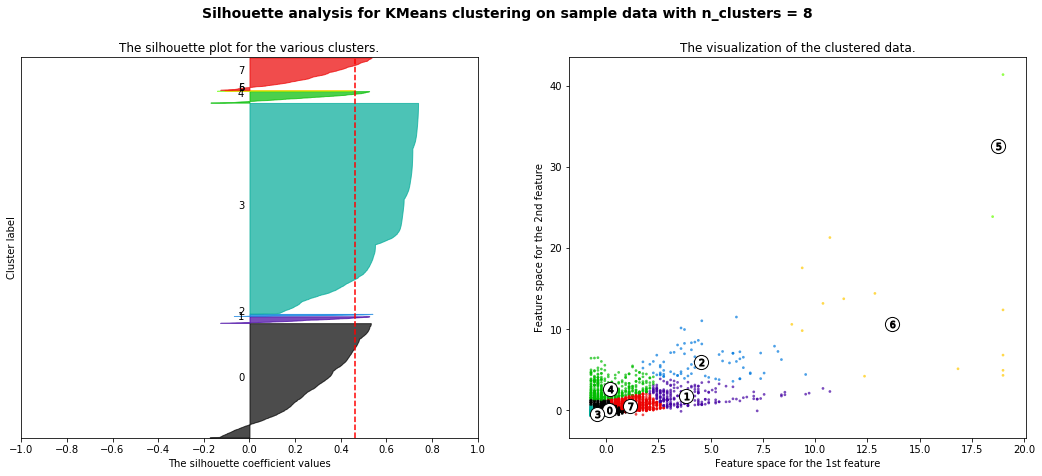

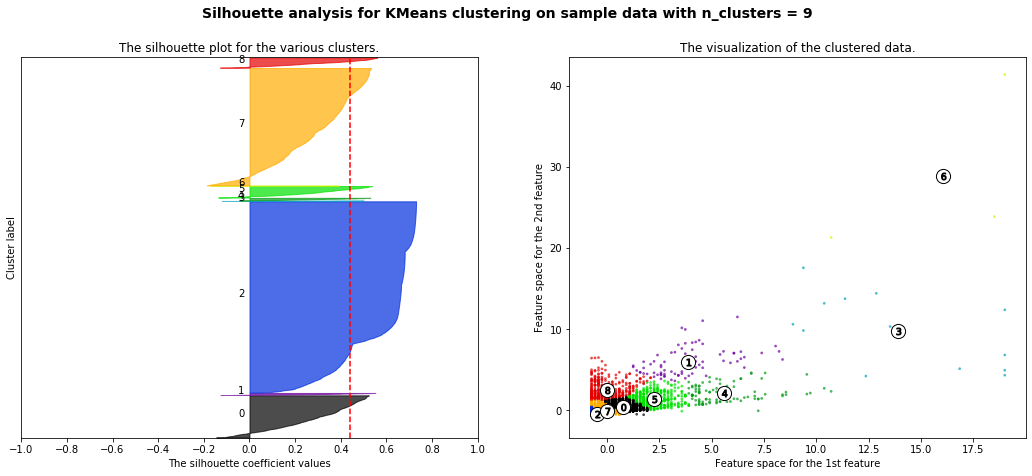

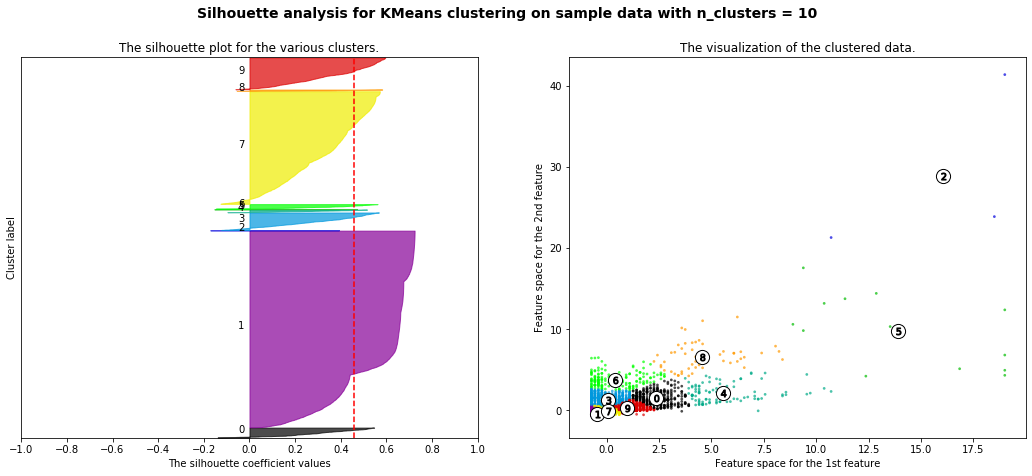

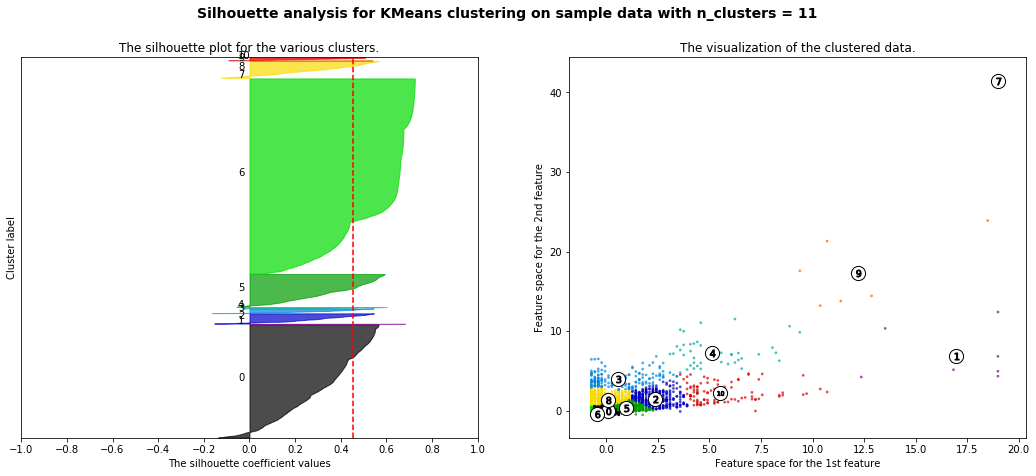

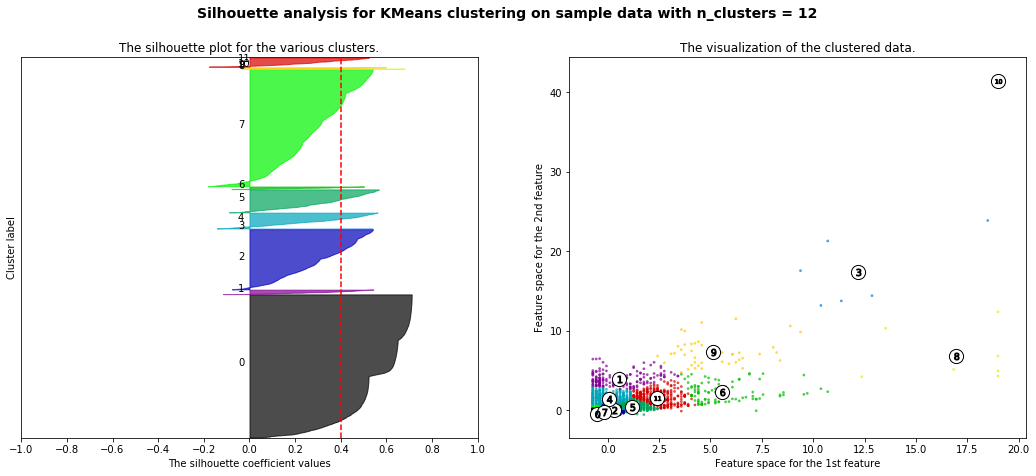

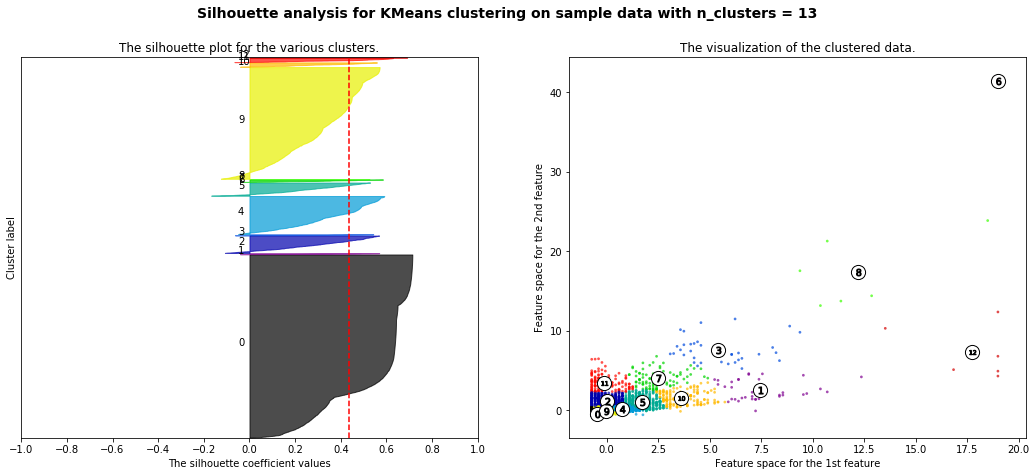

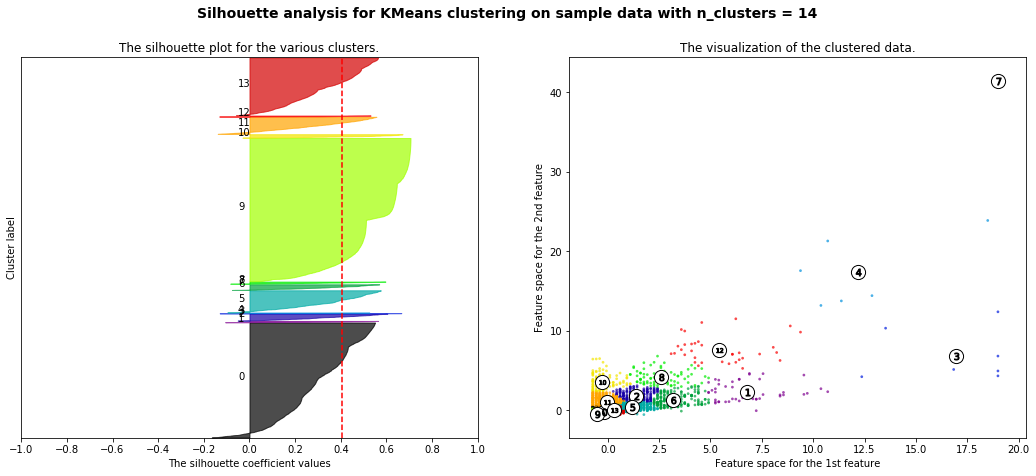

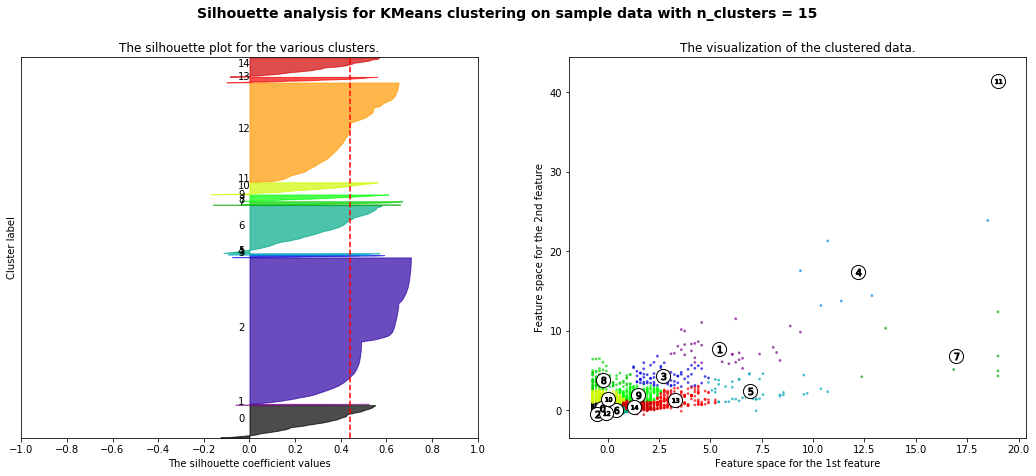

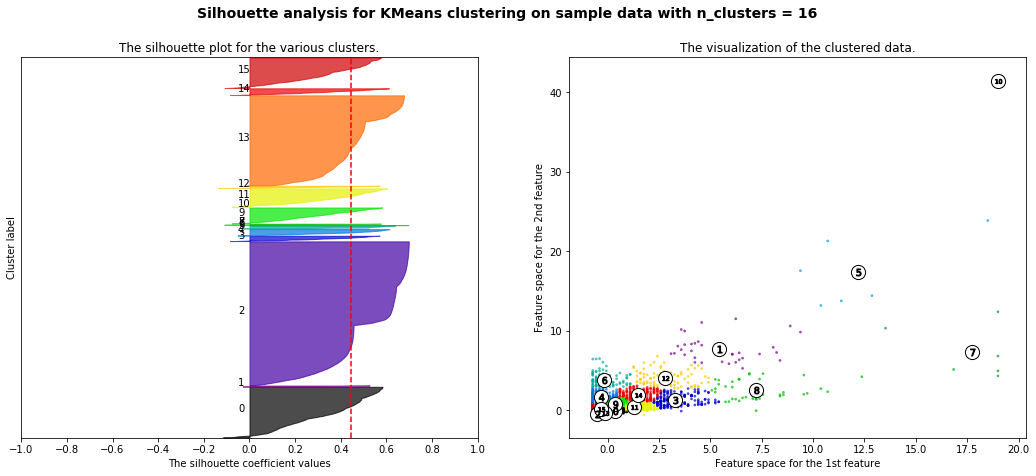

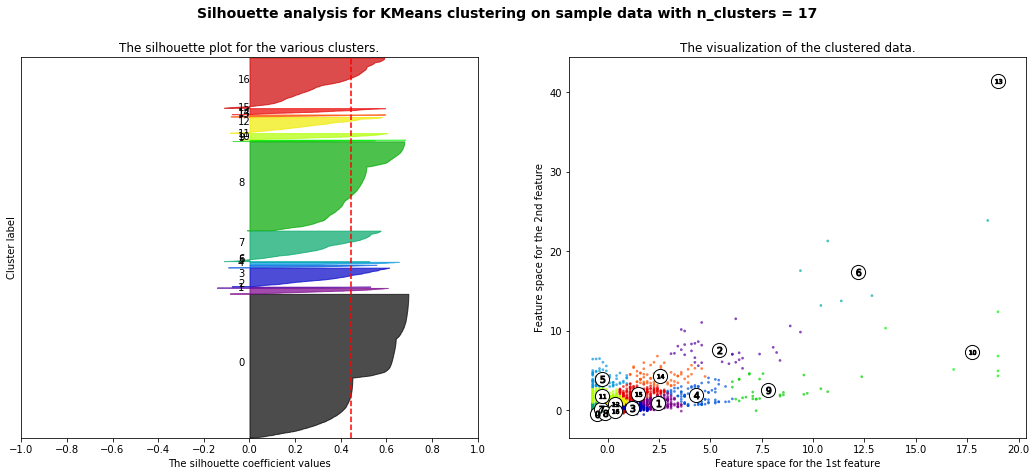

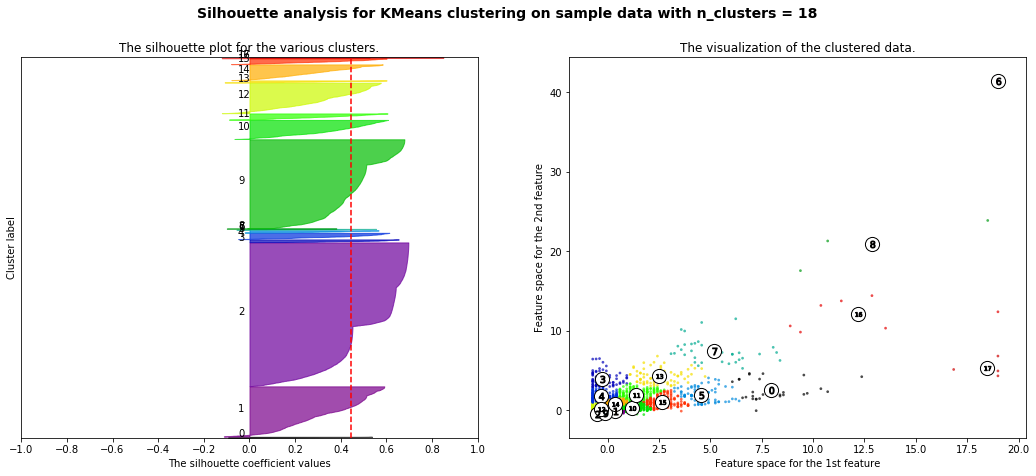

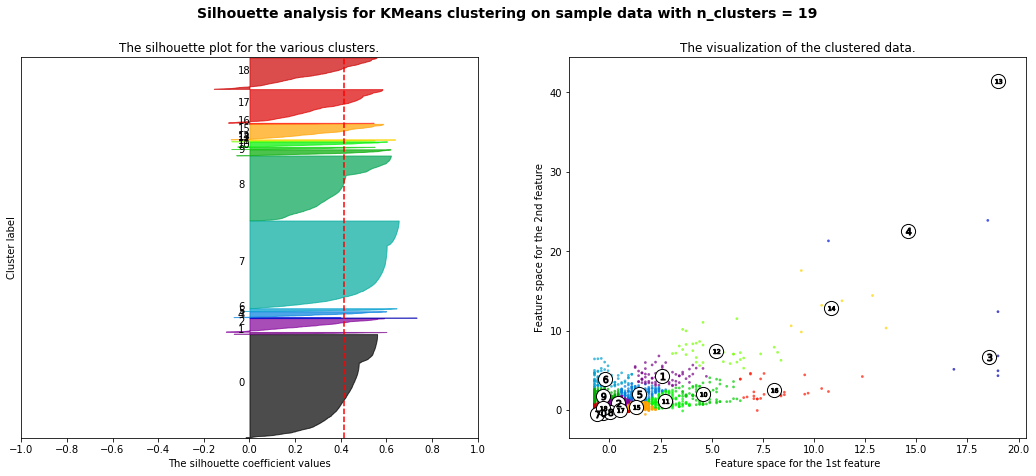

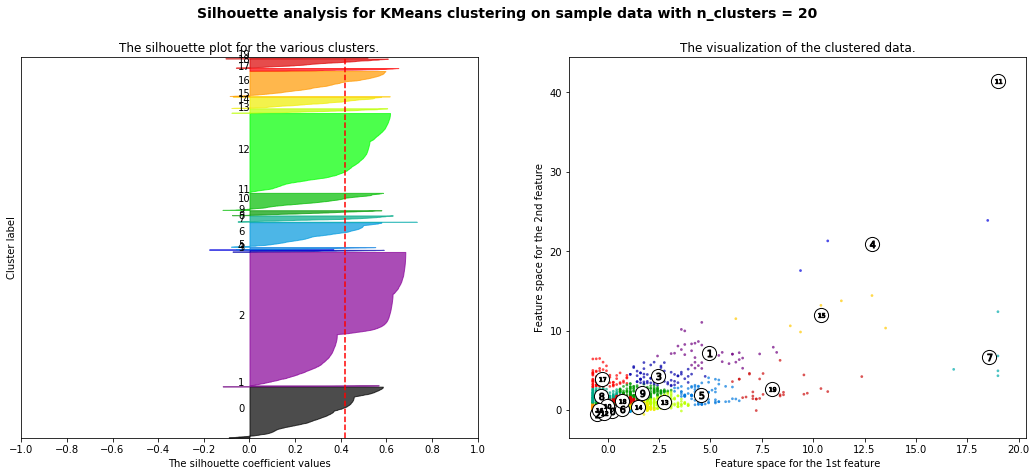

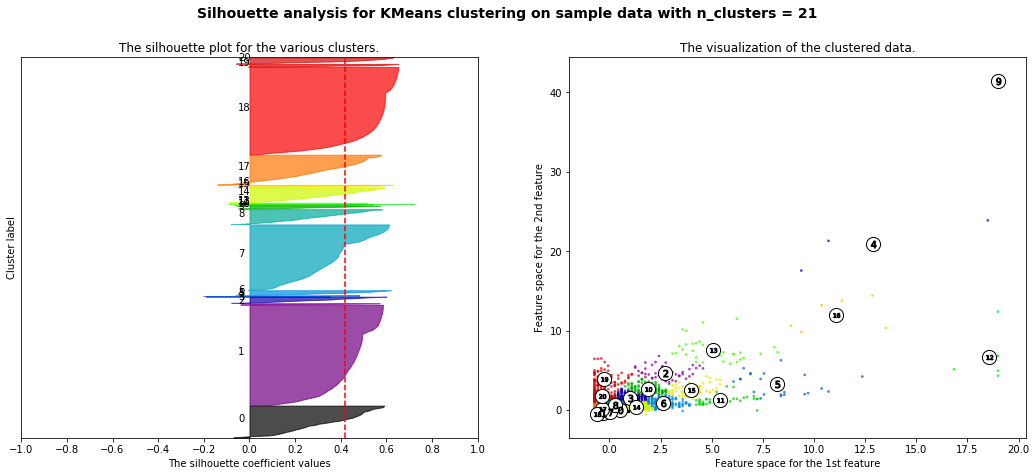

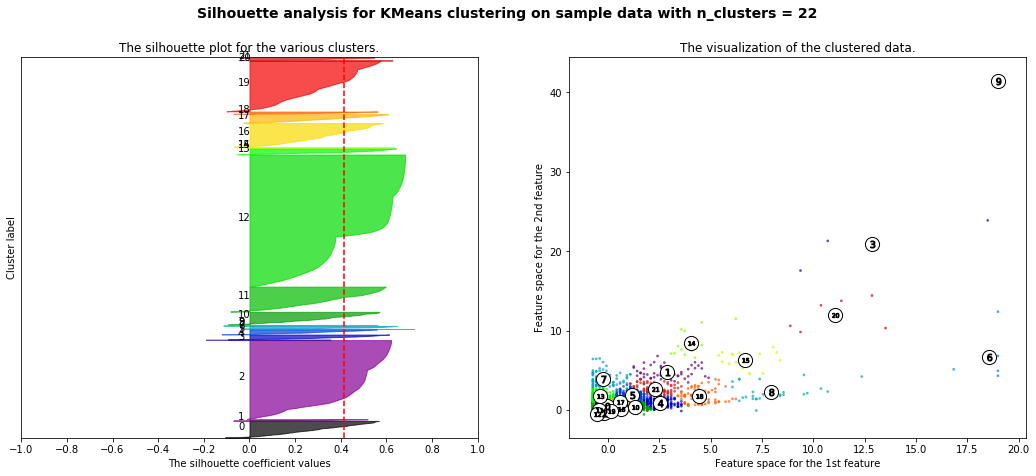

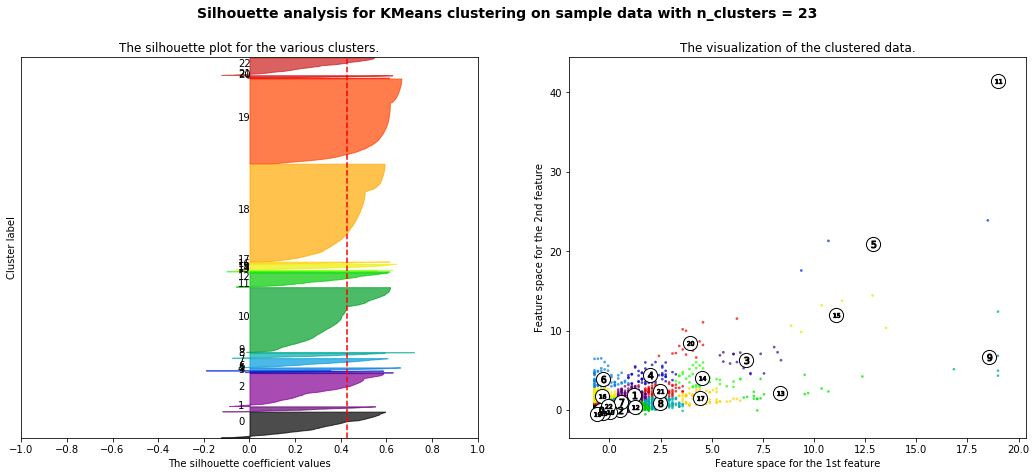

In [62]:
# Selecting the number of clusters with silhouette analysis
# Silhouette plot displays a measure of how close each point in one cluster is to points in the 
# neighboring clusters and thus provides a way to assess parameters like number of clusters visually.
# This measure has a range of [-1, 1].

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Adapted from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
for n_clusters in range(2,24):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_scaled[:, 0], x_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [65]:
kmeans = KMeans(n_clusters= 15, init='k-means++', random_state=0)
cluster_labels = kmeans.fit_predict(x_scaled)

events_cleaned['conditions_cluster']=cluster_labels


In [66]:
events_cleaned.sample(10)

,abortion_edit_indicator,age_group,apr_drg_code,apr_drg_description,apr_mdc_code,apr_mdc_description,apr_medical_surgical_description,apr_risk_of_mortality,apr_severity_of_illness_code,apr_severity_of_illness_description,...,payment_typology_2,payment_typology_3,permanent_facility_id,race,total_charges,total_costs,type_of_admission,zip_code_3_digits,zip_imputed,conditions_cluster
11198,N,30 to 49,750,Schizophrenia,19,Mental Diseases and Disorders,Medical,Minor,2,Moderate,...,Medicare,Medicaid,102,White,4639.50,2777.0,Emergency,147,0,8
10235,N,50 to 69,950,Extensive procedure unrelated to principal dia...,16,"Diseases and Disorders of Blood, Blood Forming...",Surgical,Moderate,3,Major,...,NaN,NaN,98,Multi-racial,15741.60,6616.0,Emergency,140,0,8
10876,N,30 to 49,751,Major depressive disorders & other/unspecified...,19,Mental Diseases and Disorders,Medical,Minor,3,Major,...,NaN,NaN,102,White,7101.86,3453.0,Emergency,147,0,8
10016,N,70 or Older,139,Other pneumonia,4,Diseases and Disorders of the Respiratory System,Medical,Minor,2,Moderate,...,Medicare,Private Health Insurance,98,Multi-racial,15321.93,6409.0,Emergency,147,0,8
14796,N,50 to 69,201,Cardiac arrhythmia & conduction disorders,5,Diseases and Disorders of the Circulatory System,Medical,Minor,1,Minor,...,Private Health Insurance,NaN,103,White,3525.02,1460.0,Emergency,147,0,0
4867,N,70 or Older,720,Septicemia & disseminated infections,18,"Infectious and Parasitic Diseases, Systemic or...",Medical,Extreme,3,Major,...,Private Health Insurance,NaN,66,White,16720.74,9649.0,Emergency,147,0,9
1698,N,70 or Older,308,Hip and femur fracture repair,8,Diseases and Disorders of the Musculoskeletal ...,Surgical,Moderate,2,Moderate,...,Private Health Insurance,Self-Pay,39,White,28713.50,13777.0,Emergency,147,0,4
1346,N,30 to 49,560,Vaginal delivery,14,"Pregnancy, Childbirth and the Puerperium",Medical,Minor,1,Minor,...,Self-Pay,Self-Pay,39,White,5124.25,2944.0,Urgent,147,0,0
845,N,70 or Older,140,Chronic obstructive pulmonary disease,4,Diseases and Disorders of the Respiratory System,Medical,Moderate,2,Moderate,...,Private Health Insurance,Self-Pay,39,White,9384.75,3918.0,Emergency,147,0,0
18842,N,70 or Older,860,Rehabilitation,23,"Rehabilitation, Aftercare, Other Factors Influ...",Medical,Major,3,Major,...,Self-Pay,NaN,207,White,22857.59,9622.0,Urgent,140,0,9


In [58]:
df=events_cleaned.reset_index(drop=True)

# Versioning

from datetime import date
today = date.today()
# dd/mm/YY
dt= today.strftime("%d%m%Y")
print(dt)

rows,cols = events_cleaned.shape

name='adverse_health_clusters' + dt + 'rows'+ str(rows) +'.csv'

df.to_csv(name)

07112019
